/home/banyh2000/anaconda3/envs/odfn/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


170.71105190433354


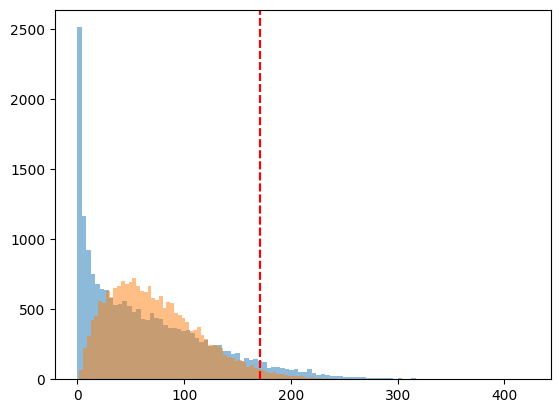

In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
import os
os.chdir('..')
from scripts.utils.utils_odfn import dict_variance,dict_variance_5_class

# random select 25 bounding boxes in range of (64,64)
boxes = []
for i in range(8000):
    x = np.random.randint(0,64)
    y = np.random.randint(0,64)
    x_ = np.random.randint(0,64)
    y_ = np.random.randint(0,64)
    boxes.append([x+x_,y+y_])

boxes = np.array(boxes)/2
boxes = np.var(boxes,axis=0)
boxes = np.mean(boxes)

fig,ax = plt.subplots()
# plot a vertical line with the x value of boxes
ax.axvline(x=boxes, color='r', linestyle='--')
print(boxes)
ax.hist(list(dict_variance.values()), bins=100, label='variance',alpha=0.5)
fig.savefig('/home/banyh2000/odfn/wrapup_data/variance_1.png')

# fig,ax = plt.subplots()
ax.axvline(x=boxes, color='r', linestyle='--')
ax.hist(list(dict_variance_5_class.values()), bins=100, label='variance',alpha=0.5)
fig.savefig('/home/banyh2000/odfn/wrapup_data/variance_2.png')

AttributeError: 'numpy.ndarray' object has no attribute 'axvline'

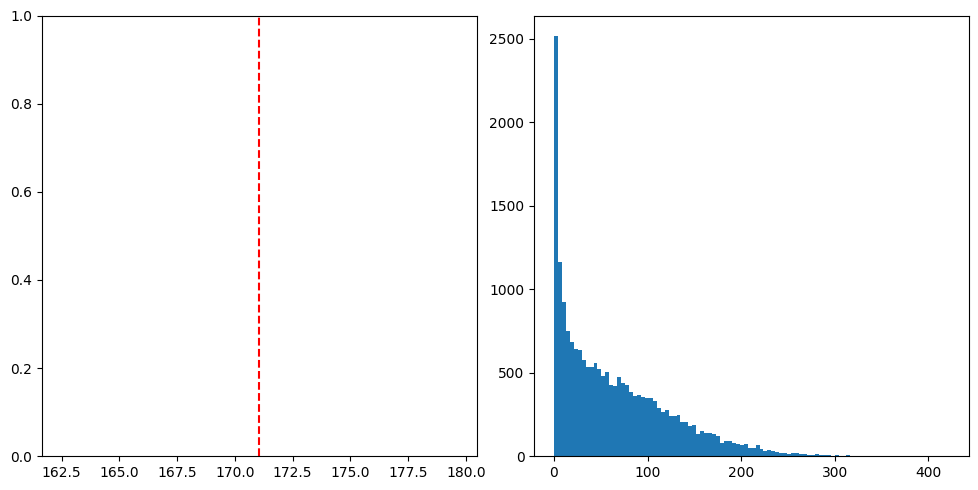

In [2]:
import numpy as np
import json
import matplotlib.pyplot as plt
import os
os.chdir('..')
from scripts.utils.utils_odfn import dict_variance,dict_variance_5_class

# random select 25 bounding boxes in range of (64,64)
boxes = []
for i in range(10000):
    x = np.random.randint(0,64)
    y = np.random.randint(0,64)
    x_ = np.random.randint(0,64)
    y_ = np.random.randint(0,64)
    boxes.append([x+x_,y+y_])

boxes = np.array(boxes)/2
boxes = np.var(boxes,axis=0)
boxes = np.mean(boxes)

fig,ax = plt.subplots(1,2,figsize=(10,5))
fig.tight_layout()
# plot a vertical line with the x value of boxes
ax[0].axvline(x=boxes, color='r', linestyle='--')
ax[1].hist(list(dict_variance.values()), bins=100, label='variance')

ax.axvline(x=boxes, color='r', linestyle='--')
ax.hist(list(dict_variance_5_class.values()), bins=100, label='variance')
fig.savefig('/home/banyh2000/odfn/wrapup_data/variance_2.png')

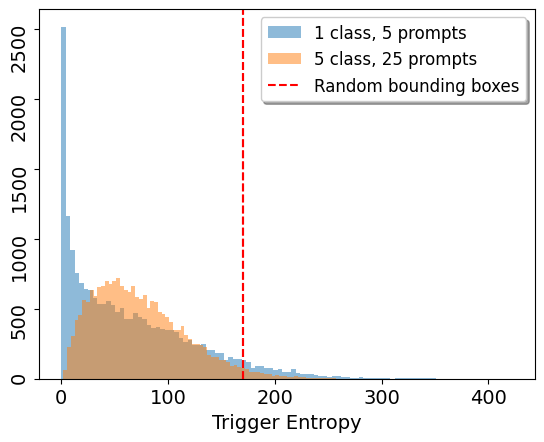

In [15]:
import numpy as np
import json
import matplotlib.pyplot as plt
import os
os.chdir('..')
from scripts.utils.utils_odfn import dict_variance,dict_variance_5_class

# random select 25 bounding boxes in range of (64,64)
boxes = []
for i in range(100000):
    x = np.random.randint(0,64)
    y = np.random.randint(0,64)
    x_ = np.random.randint(0,64)
    y_ = np.random.randint(0,64)
    boxes.append([x+x_,y+y_])

boxes = np.array(boxes)/2
boxes = np.var(boxes,axis=0)
boxes = np.mean(boxes)

fig,ax = plt.subplots()
# plot a vertical line with the x value of boxes
ax.axvline(x=boxes, color='r', linestyle='--')
ax.hist(list(dict_variance.values()), bins=100, label='1 class, 5 prompts',alpha=0.5)
ax.hist(list(dict_variance_5_class.values()), bins=100, label='5 class, 25 prompts',alpha=0.5)
ax.axvline(x=boxes, color='r', linestyle='--', label='Random bounding boxes')
legend = ax.legend(loc='upper right', shadow=True, fontsize=12)
ax.set_xlabel('Trigger Entropy', fontsize=14)
# set label font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
    
for label in ax.get_yticklabels():
    label.set_rotation(90)
fig.savefig('/home/banyh2000/odfn/wrapup_data/variance.png')

In [15]:
path = '/home/banyh2000/odfn/pics/paper/fig2'
import os
names = os.listdir(path)
import numpy as np
from mmdet.apis import DetInferencer
inferencer = DetInferencer(model='rtmdet-ins_l_8xb32-300e_coco')
dict_ = {'958699':[],'513062':[],'642482':[]}
for name in names:
    spilt = name.split('_')[2]
    results = inferencer(f'{path}/{name}')
    results = results['predictions'][0]['bboxes'][0]
    dict_[spilt].append([results[0]/2+results[2]/2,results[1]/2+results[3]/2])
for key in dict_.keys():
    dict_[key] = np.array(dict_[key])
    dict_[key] = np.var(dict_[key],axis=0)
    print(dict_[key].shape)
    dict_[key] = np.mean(dict_[key])
    print(dict_[key]/64)

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmdetection/v3.0/rtmdet/rtmdet-ins_l_8xb32-300e_coco/rtmdet-ins_l_8xb32-300e_coco_20221124_103237-78d1d652.pth


/home/banyh2000/anaconda3/envs/odfn/lib/python3.10/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/home/banyh2000/anaconda3/envs/odfn/lib/python3.10/site-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


(2,)
0.8095603789904362
(2,)
58.3485443201572
(2,)
282.9963631662753
